In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras import regularizers


In [4]:
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [5]:
traindf.shape, traindf.head()

((27455, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  


In [6]:
testdf.shape, testdf.head()

((7172, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      6     149     149     150     150     150     151     151     150   
 1      5     126     128     131     132     133     134     135     135   
 2     10      85      88      92      96     105     123     135     143   
 3      0     203     205     207     206     207     209     210     209   
 4      3     188     191     193     195     199     201     202     203   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     151  ...       138       148       127        89        82        96   
 1     136  ...        47       104       194       183       186       184   
 2     147  ...        68       166       242       227       230       227   
 3     210  ...       154       248       247       248       253       236   
 4     203  ...        26        40        64        48        29        46   
 
    pixel781  pixel782  pixel783  pixel784  
 

In [47]:
df = pd.concat([testdf, traindf], axis = 0)
df.reset_index(inplace = True, drop = True)
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
34623,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
34624,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
34625,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [48]:
labels = df['label']
df.drop(columns =['label'], inplace = True)
df.shape, labels.head()

((34627, 784), 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [49]:
# no 9(J) or 25(Z)
labels.value_counts()

0     1457
4     1455
2     1454
5     1451
11    1450
8     1450
24    1450
12    1449
7     1449
18    1445
10    1445
16    1443
1     1442
14    1442
13    1442
3     1441
6     1438
17    1438
15    1435
19    1434
23    1431
22    1431
21    1428
20    1427
Name: label, dtype: int64

In [50]:
# label_binrizer = LabelBinarizer()
# labels = label_binrizer.fit_transform(labels)

In [51]:
images = df.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [52]:
images = images/255

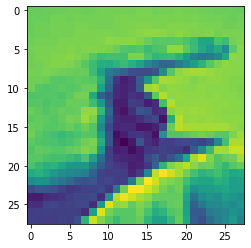

In [53]:
plt.imshow(images[0].reshape(28,28))

In [136]:
label_train[0].shape

(25,)

In [122]:
image_train, image_test, label_train, label_test = train_test_split(images, labels, random_state=23, train_size=.8)

In [123]:
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

In [72]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#  MLP

## Relu

In [57]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [58]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_test, label_test))

Train on 27701 samples, validate on 6926 samples
Epoch 1/20
27701/27701 [==============================] - 1s 54us/step - loss: 3.1959 - accuracy: 0.0318 - val_loss: 3.1588 - val_accuracy: 0.0273
Epoch 2/20
27701/27701 [==============================] - 1s 47us/step - loss: 3.1053 - accuracy: 0.0535 - val_loss: 3.0059 - val_accuracy: 0.0744
Epoch 3/20
27701/27701 [==============================] - 1s 48us/step - loss: 2.9035 - accuracy: 0.0858 - val_loss: 2.6971 - val_accuracy: 0.1021
Epoch 4/20
27701/27701 [==============================] - 1s 50us/step - loss: 2.5937 - accuracy: 0.1437 - val_loss: 2.3913 - val_accuracy: 0.1876
Epoch 5/20
27701/27701 [==============================] - 1s 49us/step - loss: 2.3455 - accuracy: 0.1964 - val_loss: 2.2395 - val_accuracy: 0.2161
Epoch 6/20
27701/27701 [==============================] - 1s 48us/step - loss: 2.1992 - accuracy: 0.2231 - val_loss: 2.1694 - val_accuracy: 0.2262
Epoch 7/20
27701/27701 [==============================] - 1s 49us/ste

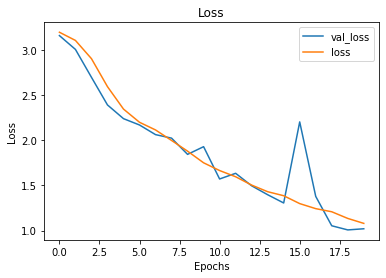

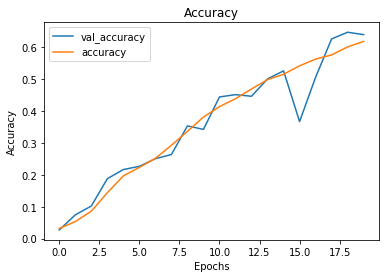

In [73]:
visualize_training_results(histoire)

## Softmax

In [63]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [64]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_test, label_test))

Train on 27701 samples, validate on 6926 samples
Epoch 1/20
27701/27701 [==============================] - 2s 57us/step - loss: 3.1306 - accuracy: 0.0877 - val_loss: 2.9539 - val_accuracy: 0.1061
Epoch 2/20
27701/27701 [==============================] - 1s 54us/step - loss: 2.6853 - accuracy: 0.1634 - val_loss: 2.7307 - val_accuracy: 0.1457
Epoch 3/20
27701/27701 [==============================] - 1s 54us/step - loss: 2.1226 - accuracy: 0.2981 - val_loss: 1.8478 - val_accuracy: 0.3858
Epoch 4/20
27701/27701 [==============================] - 1s 54us/step - loss: 1.8258 - accuracy: 0.3820 - val_loss: 1.7599 - val_accuracy: 0.4050
Epoch 5/20
27701/27701 [==============================] - 2s 55us/step - loss: 1.6454 - accuracy: 0.4387 - val_loss: 1.4652 - val_accuracy: 0.4975
Epoch 6/20
27701/27701 [==============================] - 2s 55us/step - loss: 1.4720 - accuracy: 0.4923 - val_loss: 1.5282 - val_accuracy: 0.4730
Epoch 7/20
27701/27701 [==============================] - 2s 55us/ste

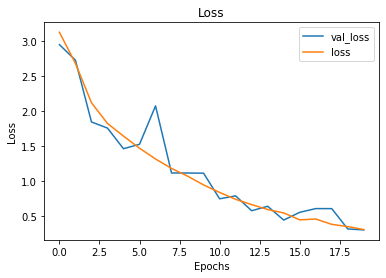

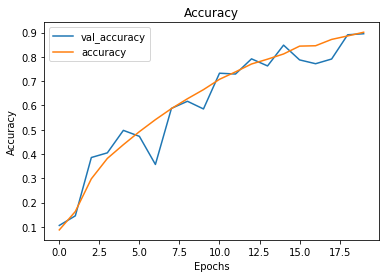

In [74]:
visualize_training_results(history)

### Hypertuning

In [76]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_test, label_test))

Train on 27701 samples, validate on 6926 samples
Epoch 1/20
27701/27701 [==============================] - 2s 75us/step - loss: 3.3595 - accuracy: 0.0870 - val_loss: 3.1290 - val_accuracy: 0.1565
Epoch 2/20
27701/27701 [==============================] - 2s 59us/step - loss: 2.8518 - accuracy: 0.1735 - val_loss: 2.6276 - val_accuracy: 0.1760
Epoch 3/20
27701/27701 [==============================] - 2s 64us/step - loss: 2.3622 - accuracy: 0.2754 - val_loss: 2.5798 - val_accuracy: 0.2307
Epoch 4/20
27701/27701 [==============================] - 2s 61us/step - loss: 2.0340 - accuracy: 0.3633 - val_loss: 1.9295 - val_accuracy: 0.3955
Epoch 5/20
27701/27701 [==============================] - 2s 57us/step - loss: 1.8080 - accuracy: 0.4340 - val_loss: 1.7420 - val_accuracy: 0.4487
Epoch 6/20
27701/27701 [==============================] - 2s 57us/step - loss: 1.6090 - accuracy: 0.4939 - val_loss: 1.4618 - val_accuracy: 0.5414
Epoch 7/20
27701/27701 [==============================] - 2s 57us/ste

# CNN

In [129]:
image_train  = np.array([np.reshape(i, (28, 28)) for i in image_train])
image_test  = np.array([np.reshape(i, (28, 28)) for i in image_test])


In [137]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv1D(32, (3), activation='relu',
                        input_shape=(28, 28)))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(32, (4), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(64, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [139]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 20,
                      batch_size=32,
                      validation_data=(image_test, label_test))

Train on 27701 samples, validate on 6926 samples
Epoch 1/20
27701/27701 [==============================] - 7s 241us/step - loss: 0.2617 - accuracy: 0.9148 - val_loss: 0.2666 - val_accuracy: 0.9163
Epoch 2/20
27701/27701 [==============================] - 6s 230us/step - loss: 0.2045 - accuracy: 0.9355 - val_loss: 0.2053 - val_accuracy: 0.9310
Epoch 3/20
27701/27701 [==============================] - 6s 215us/step - loss: 0.1533 - accuracy: 0.9548 - val_loss: 0.2673 - val_accuracy: 0.9025
Epoch 4/20
27701/27701 [==============================] - 6s 201us/step - loss: 0.1242 - accuracy: 0.9642 - val_loss: 0.1030 - val_accuracy: 0.9675
Epoch 5/20
27701/27701 [==============================] - 6s 215us/step - loss: 0.0966 - accuracy: 0.9730 - val_loss: 0.0769 - val_accuracy: 0.9809
Epoch 6/20
27701/27701 [==============================] - 8s 292us/step - loss: 0.0962 - accuracy: 0.9738 - val_loss: 0.0624 - val_accuracy: 0.9850
Epoch 7/20
27701/27701 [==============================] - 8s 29

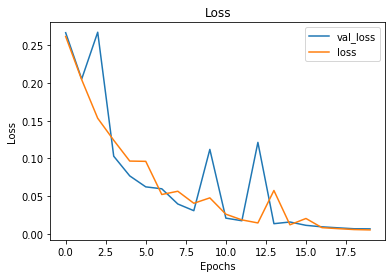

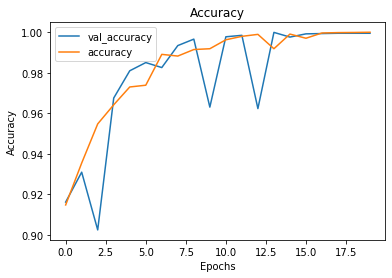

In [141]:
visualize_training_results(results)